# TP 2 : Simulation de variables aléatoires

Dans ce TP, nous allons simuler des lois de variables aléatoires à partir d'une variable uniforme sur $[0, 1]$.

Modules à importer :

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import random
import numpy as np


La fonction suivante permettra de comparer l'histogramme obtenu avec la loi correspondante dans `numpy`, pour vérifier votre code :

In [2]:
def test_hist(n, var, var_validation, *args):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    for i, f in enumerate([var, var_validation]):
        d = Counter([f(*args) for _ in range(n)])
        s = sum(d.values())
        axes[i].bar(d.keys(), [v/s for v in d.values()])
        axes[i].set_xlabel(f"valeur de X = {f.__name__}(p)")
        axes[i].set_ylabel("fréquence d'apparition de X")
        axes[i].set_title(f"Histogramme de {'np.random.' if i == 1 else ''}{f.__name__}(p)")
    plt.show()


## Loi de Bernouilli

On rappelle que $X$ suit une **loi de Bernouilli** de paramètre $p$ si :

\begin{align*}
    \mathbb{P}(X = 1)& = p\\
    \mathbb{P}(X = 0)& = 1 - p
\end{align*}

On utilisera la fonction `random.random` qui génère un flottant aléatoire entre $0$ et $1$ (c'est-à-dire une variable aléatoire uniforme $\mathcal{U}$ sur $[0, 1]$) :

In [3]:
random.random()

0.8432888054435626

````{admonition} Exercice
 En utilisant `random.random()`, écrire une fonction `flip()` simulant une loi de Bernouilli de paramètre $p = 0.5$ (`flip()` doit renvoyer $0$ ou $1$, avec probabilité $0.5$).
````

````{admonition} Exercice
 Écrire une fonction `bernouilli(p)` simulant une loi de Bernouilli de paramètre `p`. On pourra adapter la fonction précédente.
````

````{admonition} Exercice
 Écrire une fonction `test_bernouilli(p, n)` telle que `test_bernouilli(p, n)` génère $n$ fois une loi de Bernouilli de paramètre $p$ et renvoie une liste `L` telle que `L[0]` est le nombre de $0$ obtenus et `L[1]` est le nombre de $1$.  
Vérifier que vous obtenez autant de $0$ que de $1$ si $p = 0.5$, et deux fois plus de $0$ que de $1$ si $p = \frac{1}{3}$. 
````

## Loi géométrique

On rappelle que $X$ suit une **loi géométrique** de paramètre $p$ si :

$$
    \mathbb{P}(X = k) = (1 - p)^{k - 1}p
$$

**Remarque** : une loi géométrique correspond au nombre de fois qu'il faut générer une loi de Bernouilli de paramètre $p$ avant d'obtenir $1$.

````{admonition} Exercice
 En utilisant la remarque précédente, écrire une fonction `geometrique(p)` simulant une loi géométrique de paramètre `p`.
````

````{admonition} Exercice
 Tester en appelant la fonction `test_geometrique(p, n)` ci-dessous (on pourra prendre $n = 1000$ et $p = 0.5$, par exemple), qui appelle `n` fois votre fonction `geometrique(p)` et dessine l'histogramme obtenu. Un histogramme obtenu avec la fonction `np.random.geometric` est aussi affichée à droite (les deux dessins doivent se ressembler fortement, comme sur l'exemple ci-dessous).
````

In [8]:
def test_geometrique(p, n):
    test_hist(n, geometrique, np.random.geometric, p)

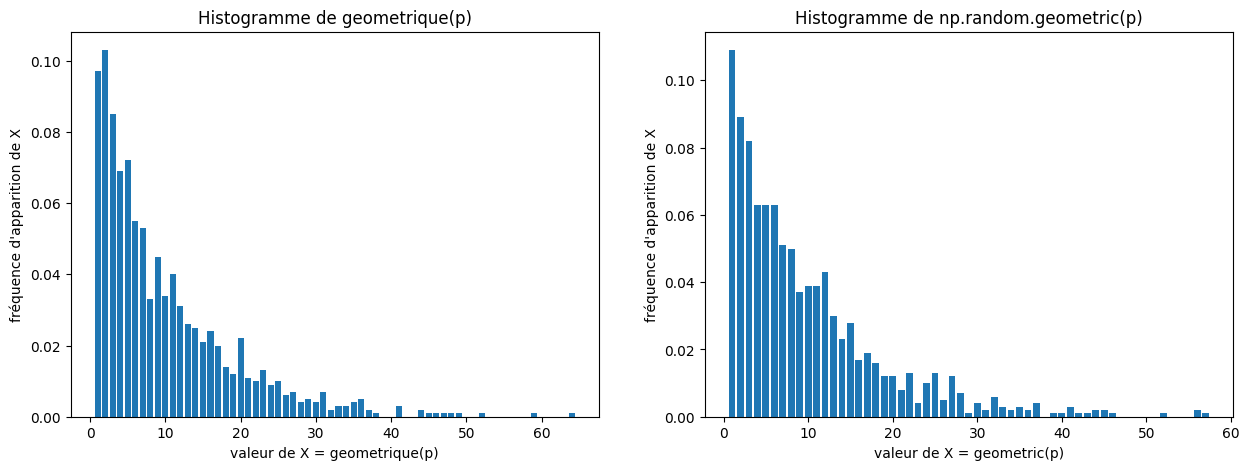

In [9]:
test_geometrique(0.1, 1000)

## Loi binomiale

$X$ suit une loi binomiale de paramètres $n$ et $p$ si, pour $k = 0, 1, ..., n$ :

$$
    \mathbb{P}(X = k) = \binom{n}{k}p^k (1 - p)^{n - k}
$$

**Définition équivalente** : $X$ est une somme de $n$ variables de Bernouilli de paramètre $p$.

````{admonition} Exercice
 En utilisant cette deuxième définition, écrire une fonction `binomial(n, p)` simulant une loi binomiale de paramètre $n$, $p$.
````

````{admonition} Exercice
 Tester avec la fonction suivante (prendre par exemple $n = 100$ et $p = 0.5$). Vous devez obtenir un dessin ressemblant à celui ci-dessous.
````

In [11]:
def test_binomial(n, p):
    test_hist(1000, binomial, np.random.binomial, n, p)

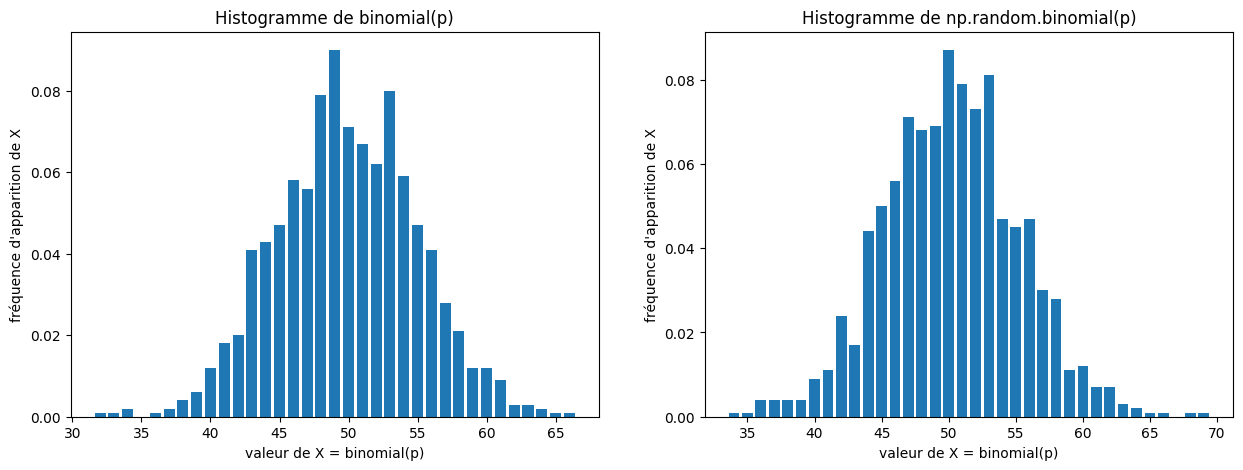

In [12]:
test_binomial(100, 0.5)

## Simulation d'une loi normale à partir d'une loi Binomiale

On rappelle que le **théorème central limite** :  
> Soient $X_1$, ..., $X_n$ des variables indépendantes et de même loi, d'espérance $\mu$ et d'écart-type $\sigma$.  
> Soit $S_n = X_1 + ... + X_n$. Alors $\frac{S_n - n\mu}{\sigma\sqrt{n}}$ converge vers une loi normale centrée réduite.

**Remarque** : une loi normale est aussi appelée loi gaussienne.  


Dans la suite, $X_1$, ..., $X_n$ sont des variables de Bernouilli de paramètre $p$ et $S_n$ est une variable binomiale de paramètre $n$, $p$ (obtenue avec la fonction `binomial` ci-dessus).

````{admonition} Exercice
 Calculer $\mu$ et $\sigma$ (sur papier, sans utiliser l'ordinateur).
````

````{admonition} Exercice
  Écrire une fonction  `central_limite(n, p)` renvoyant $\frac{S_n - n\mu}{\sigma\sqrt{n}}$. On remplacera $\sigma$ et $\mu$ par les valeurs trouvées à la question précédente.
````

````{admonition} Exercice
 Tester avec la fonction ci-dessous, qui compare le résultat de $\frac{S_n - n\mu}{\sigma\sqrt{n}}$ avec une loi normale centrée réduite. Vous devez obtenir un dessin similaire à celui ci-dessous.
````

In [14]:
def test_central(n, p):
    mu, sigma = 0, 1
    values = [central_limite(n, p) for _ in range(1000)]
    plt.figure(figsize=(8, 5))
    count, bins, ignored = plt.hist(values, 50, density=True)
    plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)), color='r', label="Loi normale")
    plt.axis([-3, 3, 0, .6])
    plt.legend()
    plt.show()

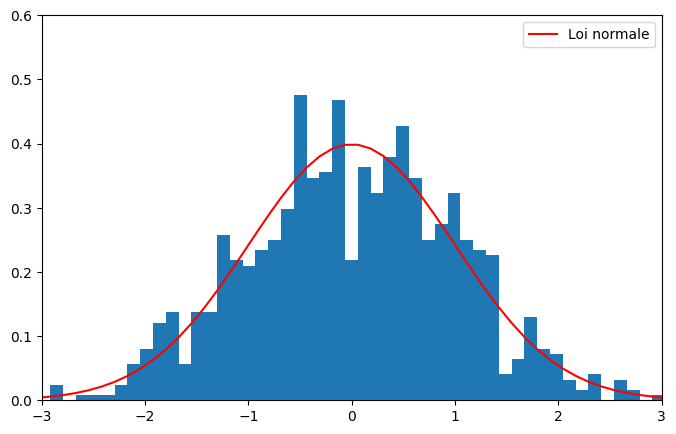

In [15]:
test_central(1000, 0.6)

## Méthode de la transformée inverse

**Définition** : Soit $X$ une variable aléatoire. Sa fonction de répartition $F$ est définie par :

$$
    F(x) = \mathbb{P}(X \leq x)
$$

**Théorème (admis)** : Soit $X$ une variable aléatoire de fonction de répartition $F$ (supposée ici inversible) et $\mathcal{U}$ une variable aléatoire uniforme sur $[0, 1]$. Alors $F^{-1}(\mathcal{U})$ est une variable aléatoire de loi $X$.

**Remarque** : Si $F$ n'est pas inversible alors le théorème reste vrai en remplaçant $F^{-1}$ par $Q(u) = \inf\{x : F(x) \geq u\}$.

Comme nous savons comment simuler $\mathcal{U}$ (avec `random.random()`), nous pouvons simuler n'importe quelle loi de probabilité, à condition de savoir inverser sa fonction de répartition.

## Loi exponentielle

Une variable aléatoire $X$ est de **loi exponentielle** de paramètre $a$ si sa fonction de répartition est, pour $x\in \mathbb{R}^+$ :

$$
    F(x) = 1 - e^{-a x}
$$

> Une loi exponentielle modélise la durée de vie d'un phénomène sans mémoire, ou sans vieillissement, ou sans usure : la probabilité que le phénomène dure au moins s + t heures (ou n'importe quelle autre unité de temps) sachant qu'il a déjà duré t heures sera la même que la probabilité de durer s heures à partir de sa mise en fonction initiale. En d'autres termes, le fait que le phénomène ait duré pendant t heures ne change rien à son espérance de vie à partir du temps t.

````{admonition} Exercice
 Montrer que $F^{-1}(y) = -\frac{\ln(1 - y)}{a}$ (sur papier, sans utiliser l'ordinateur).
````

````{admonition} Exercice
 En déduire une fonction `exponentielle(a)` simulant une loi exponentielle de paramètre `a`.
````

````{admonition} Exercice
 Tester avec la fonction suivante (prendre par exemple $a = 2$ et $n = 1000$).
````

In [17]:
def test_exponentielle(n, a):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    for i, f in enumerate([exponentielle, np.random.exponential]):
        if i == 1:
            a /= 1
        X = np.array([f(a) for _ in range(n)])
        values, base = np.histogram(X, bins=1000)
        axes[i].plot(base[:-1], np.cumsum(values)/sum(values))
        axes[i].set_xlabel(f"valeur de X = {f.__name__}(p)")
        axes[i].set_ylabel("fréquence d'apparition de X")
        axes[i].set_title(f"Histogramme de {'np.random.' if i == 1 else ''}{f.__name__}(p)")
    plt.show()

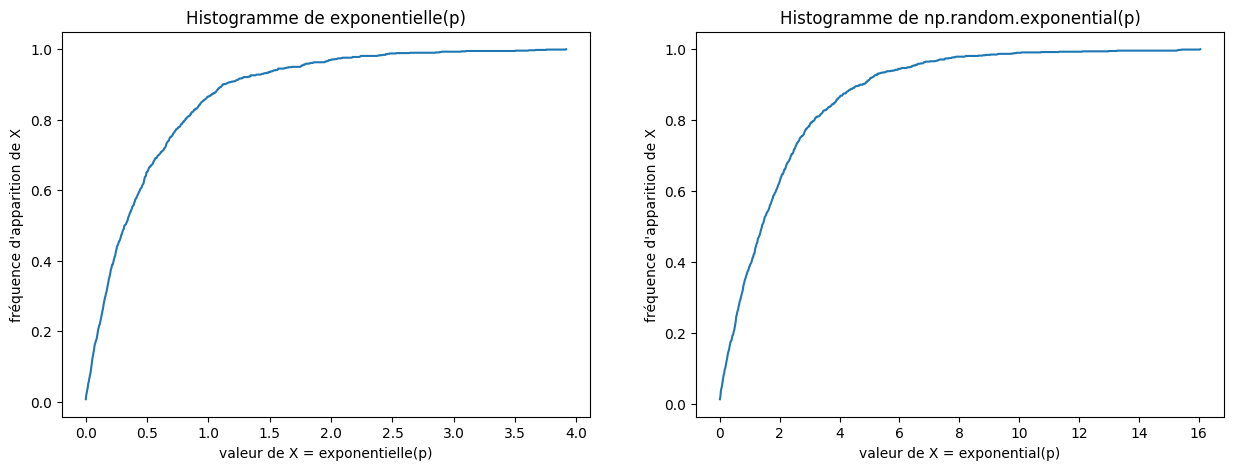

In [18]:
test_exponentielle(1000, 2)

## Loi de Poisson

Une variable aléatoire discrète $X$ suit une **loi de Poisson** de paramètre $a$ si :

$$
    \forall k \in \mathbb{N}, \mathbb{P}(X = k) = \frac{e^{-a}a^k}{k!}
$$

> La loi de Poisson est une loi de probabilité discrète qui décrit le comportement du nombre d'événements se produisant dans un intervalle de temps fixé, si ces événements se produisent avec une fréquence moyenne ou espérance connue, et indépendamment du temps écoulé depuis l'événement précédent.

### Simulation à partir de lois exponentielles

On admet le théorème suivant permettant de simuler une loi de Poisson à partir d'une loi exponentielle :

**Théorème** : Soit $X_1$, ..., $X_n$, ... des variables exponentielles de paramètre $a$. Soit $S_n = X_1 + ... + X_n$. Soit $Y$ la plus grande valeur de $n$ pour laquelle $S_{n} \leq 1$.  
Alors $Y$ suit une loi de Poisson de paramètre $a$.

````{admonition} Exercice
 Écrire une fonction `poisson(a)` simulant une loi de Poisson de paramètre `a`, en utilisant le théorème précédent. On pourra compléter le code suivant :

```python
def poisson(a):
    s = 0 # valeur de Sn
    n = 0
    while ...:
        ...
    return n
```
````

````{admonition} Exercice
 Tester avec la fonction suivante (prendre par exemple $a = 3$ et $n = 1000$).
````

In [20]:
def test_poisson(a, n):
    test_hist(n, poisson, np.random.poisson, a)

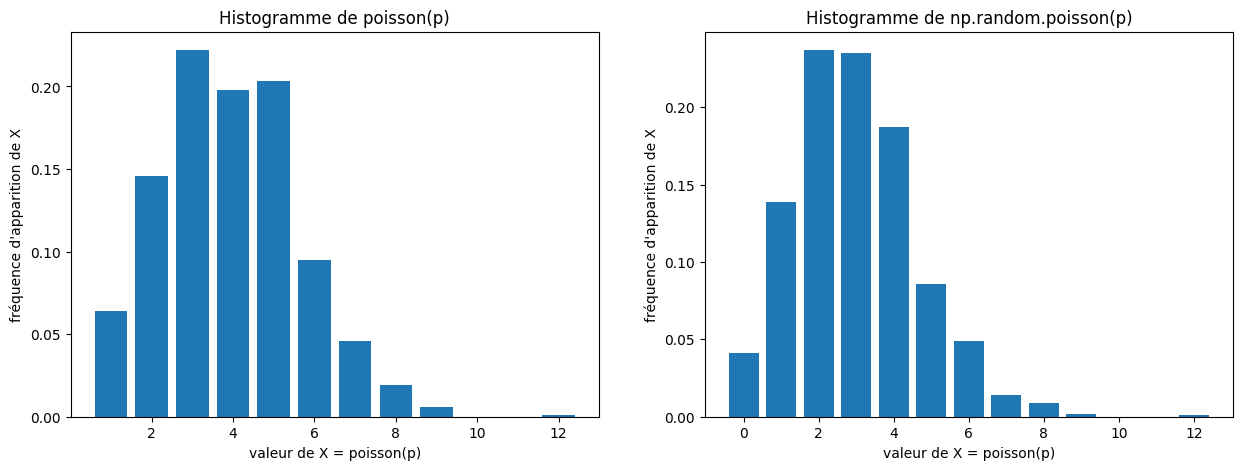

In [21]:
test_poisson(3, 1000)

### Approximation à partir d'une loi binomiale

````{admonition} Exercice
 (Difficile) Montrer (sur papier, sans ordinateur) que si $np = a$ alors :

$$
    \lim_{n \longrightarrow \infty} \binom{n}{k} p^k (1 - p)^{n - k} = e^{-a} \frac{a^k}{k!}
$$
````

D'après l'exercice précédent, une loi binomiale de paramètres $n$, $p$ avec $np = a$ converge vers une loi de Poisson de paramètre $a$.

````{admonition} Exercice
 En déduire une fonction `poisson_approx(a)` approximant une loi de Poisson en renvoyant une loi binomiale de paramètre $n$, $p$ avec $np = a$. On prendra $n$ assez grand, par exemple $100$. Tester en comparant avec `poisson(a)`.
````

Si vous avez terminé le TP, vous pouvez vous entraîner avec [ces exercices](https://cpge-itc.github.io/itc1/2_tp_semestre1/1_dictionnaire).